1.Загрузить файл hr.csv.

In [1]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns
import statistics
%matplotlib inline


In [2]:
data = pd.read_csv("HR.csv")
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


2. Рассчитать основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение).

In [8]:
data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [9]:
data.median() # медиана

satisfaction_level         0.64
last_evaluation            0.72
number_project             4.00
average_montly_hours     200.00
time_spend_company         3.00
Work_accident              0.00
left                       0.00
promotion_last_5years      0.00
dtype: float64

In [10]:
for i in data.columns:
    try:
        print(f'moda for column {i}: {statistics.mode(data[i])}')
    except:
        print(f'for column {i}, not mode')

moda for column satisfaction_level: 0.1
moda for column last_evaluation: 0.55
moda for column number_project: 4
for column average_montly_hours, not mode
moda for column time_spend_company: 3
moda for column Work_accident: 0
moda for column left: 0
moda for column promotion_last_5years: 0
moda for column sales: sales
moda for column salary: low


3.Рассчитать и визуализировать корреляционную матрицу для переменных.

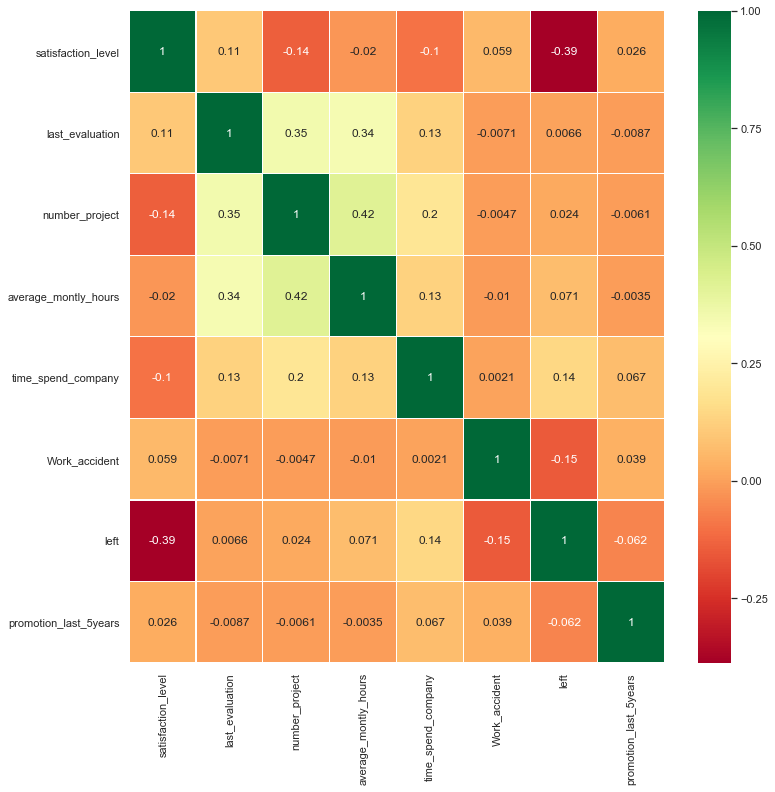

In [11]:
import seaborn as sns
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.show()

4.Визуализировать несколько взаимосвязей между переменными.

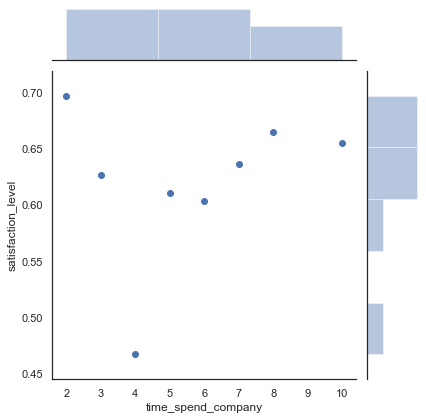

In [24]:
bs = data.groupby('time_spend_company').mean().reset_index()

sns.jointplot(x='time_spend_company', y='satisfaction_level', 
              data=bs)
# Взимосвязь времени работы в компании с удовлетворённостью работой

5.С использованием t-test статистики проверить взаимосвязи между несколькими переменными.

In [13]:
d1 = data[(data['salary']=='low')]['average_montly_hours'].head(1000)

d2 = data[(data['salary']=='high')]['average_montly_hours'].head(1000)

stats.ttest_ind(d1, d2)

Ttest_indResult(statistic=3.138000000628602, pvalue=0.001725866864809302)

*p value ниже 0.05, значит различия между группами  c низкой и высокой зарплатой присутствуют*

6.Рассчитать сколько работников работает в каждом департаменте.

In [14]:
data['number_project'].value_counts()

4    4365
3    4055
5    2761
2    2388
6    1174
7     256
Name: number_project, dtype: int64

7.Показать распределение сотрудников по зарплатам.

In [15]:
data['salary'].value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

*8.Показать распределение сотрудников по зарплатам совместно с департаментами*

In [18]:
pd.DataFrame(data.groupby(['sales', 'salary']).size()).style.bar()

*9. Сколько сотрудников покинули компанию*

In [20]:
print('Число сотрудников покинувших компанию составляет ',len(data[data['left']==1]),' человек')

Число сотрудников покинувших компанию составляет  3571  человек


*10.Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию*

Гиоптеза 1 - у сотрудников отличается удовлетворённотьсть работой

In [21]:
stat_1 = data[data['left'] == 1]['satisfaction_level'].head(3500)
stat_2= data[data['left'] == 0]['satisfaction_level'].head(3500)
stats.ttest_ind(stat_1, stat_2)

Ttest_indResult(statistic=-40.30854952041722, pvalue=0.0)

гипотеза подтверждена у уволившихся сотрудников удовлетворённость работой гораздо ниже

Гиоптеза 2 - у сотрудников разное сренее время работы в месяц

In [22]:
stat_1 = data[data['left'] == 1]['average_montly_hours'].head(3500)
stat_2= data[data['left'] == 0]['average_montly_hours'].head(3500)
stats.ttest_ind(stat_1, stat_2)

Ttest_indResult(statistic=6.658273688772054, pvalue=2.9805780833980146e-11)

гипотеза не подтвердилась, среднее вемя работы в месяце не влияет на уход.